In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [122]:
data=pd.read_csv("EastWestAirlines.csv")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [38]:
data1=data.drop(['ID#'],axis=1)
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [41]:
norm=MinMaxScaler()
df=pd.DataFrame(norm.fit_transform(data1))
df

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


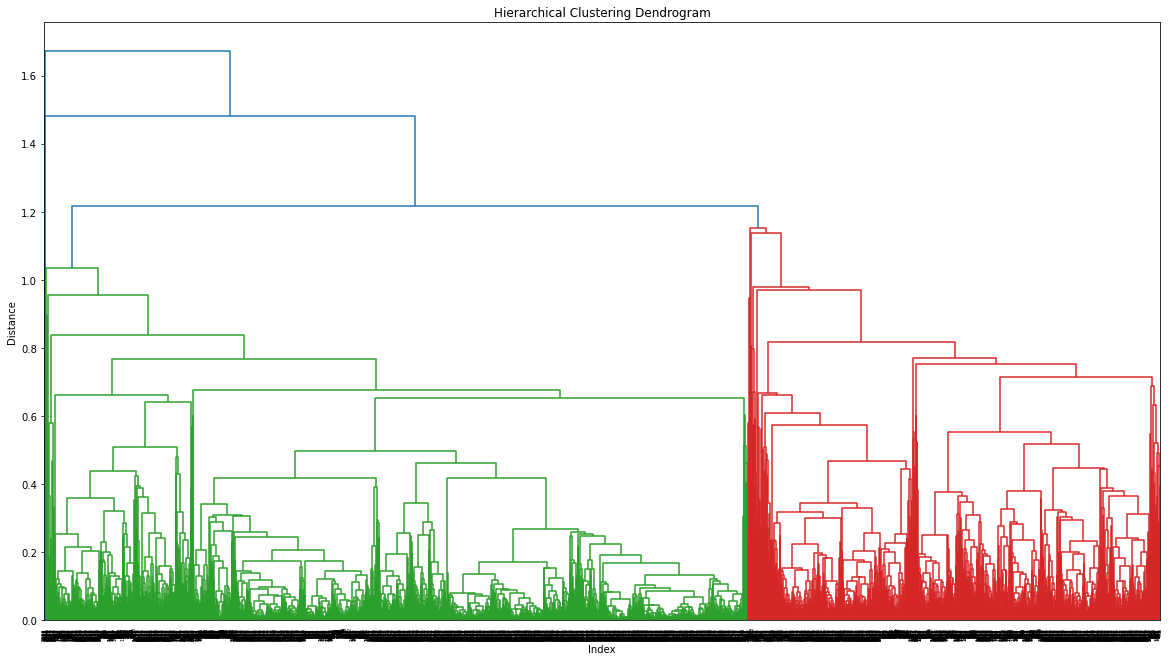

In [44]:
z = linkage(df, method="average",metric="euclidean")
plt.figure(figsize=(20, 11))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

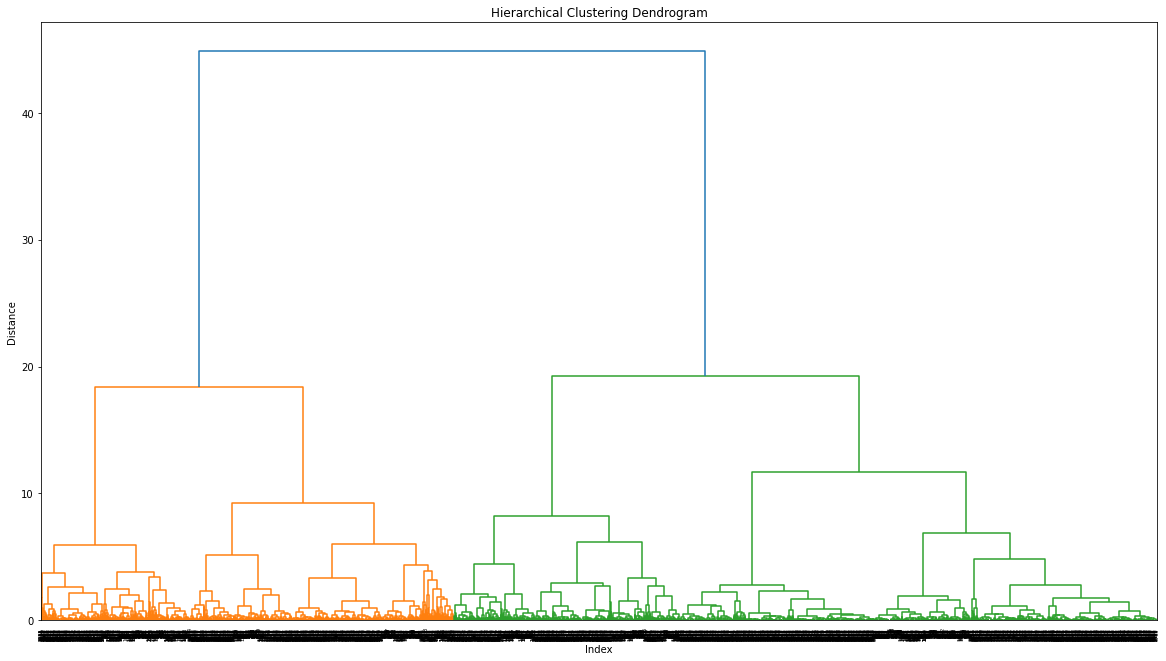

In [47]:
z = linkage(df, method="ward",metric="euclidean")
plt.figure(figsize=(20, 11))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [50]:
H=AgglomerativeClustering(n_clusters=5,linkage='ward',affinity='euclidean').fit(df)
H.labels_
labels=pd.Series(H.labels_)
data1['clust']=labels
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [53]:
data1.groupby(data1.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


In [56]:
data1[(data1.clust==1)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3786,27669,0,1,1,1,3219,7,0,0,3413,0,1
3790,73159,0,1,1,1,358,4,358,4,3237,0,1
3793,38827,0,1,1,1,0,0,0,0,2993,0,1
3794,29919,0,1,1,1,1225,3,0,0,2949,0,1


In [59]:
data1.clust.value_counts() #since the entries in the data are large it is not preferrable to create clusters using agglomerative

1    1011
0     946
2     808
4     699
3     535
Name: clust, dtype: int64

## **KMeans**

In [62]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x) 

In [65]:
normdf=norm_func(data.iloc[:,1:])
normdf

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


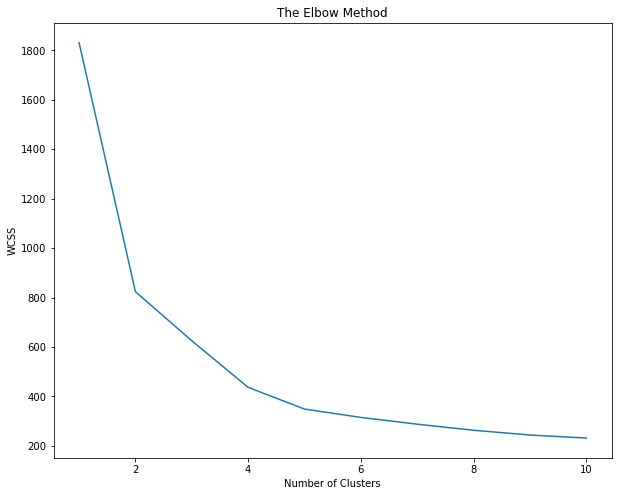

In [68]:
fig = plt.figure(figsize=(10, 8))
WCSS = [] #within cluster sum of squares
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(normdf)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 

In [71]:
km=KMeans(n_clusters=5)
km_pred=km.fit_predict(normdf)
km_pred

array([3, 3, 3, ..., 1, 0, 0])

In [74]:
km.cluster_centers_

array([[ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01, -4.44089210e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01, -3.88578059e-16],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
  

In [77]:
km.inertia_

348.9433217254137

In [80]:
m=pd.Series(km_pred)
m

0       3
1       3
2       3
3       3
4       1
       ..
3994    2
3995    2
3996    1
3997    0
3998    0
Length: 3999, dtype: int32

In [83]:
normdf['clust']=m
normdf

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,3
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,3
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,3
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,3
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,1
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [86]:
normdf.groupby(normdf.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,0.019414,0.008444,0.017684,0.008236,0.001696,0.012305,0.071784,0.006907,0.011390,0.239981,0.0
1,0.063535,0.017791,0.728960,0.000619,0.006498,0.172970,0.234904,0.023160,0.040421,0.586139,1.0
2,0.048995,0.026054,0.039004,0.016345,0.002229,0.033564,0.121825,0.033427,0.059407,0.522892,1.0
3,0.029282,0.008065,0.030530,0.009793,0.000288,0.013149,0.080391,0.007912,0.013738,0.671079,0.0
4,0.069389,0.006590,0.646036,0.000809,0.005663,0.119022,0.200384,0.007272,0.011846,0.532620,0.0


<Figure size 720x576 with 0 Axes>

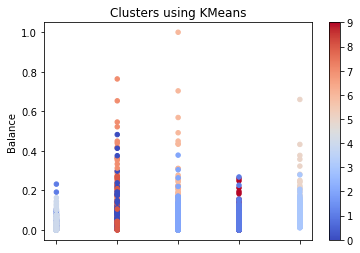

In [89]:
plt.figure(figsize=(10,8))
normdf.plot(x="clust",y ="Balance",c=clf.labels_,kind="scatter",cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 
plt.show()

**Kmeans n=4**

In [90]:
ndf=normdf.iloc[:,0:11]
ndf

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [92]:
k=KMeans(n_clusters=4)
pred=k.fit_predict(ndf)
pred

array([1, 1, 1, ..., 0, 1, 1])

In [94]:
k.inertia_

436.70885761932624

In [96]:
k.cluster_centers_

array([[ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01, -4.99600361e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -3.33066907e-16]])

In [98]:
ndf['clust']=pred
ndf

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


In [100]:
ndf.groupby(ndf.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,0.063535,0.017791,0.728960,0.000619,0.006498,0.172970,0.234904,0.023160,0.040421,0.586139,1.0
1,0.023901,0.008284,0.023195,0.008962,0.001054,0.012648,0.075450,0.007353,0.012433,0.436112,0.0
2,0.048995,0.026054,0.039004,0.016345,0.002229,0.033564,0.121825,0.033427,0.059407,0.522892,1.0
3,0.069234,0.006558,0.644122,0.000805,0.005636,0.118637,0.200595,0.007313,0.011941,0.534640,0.0


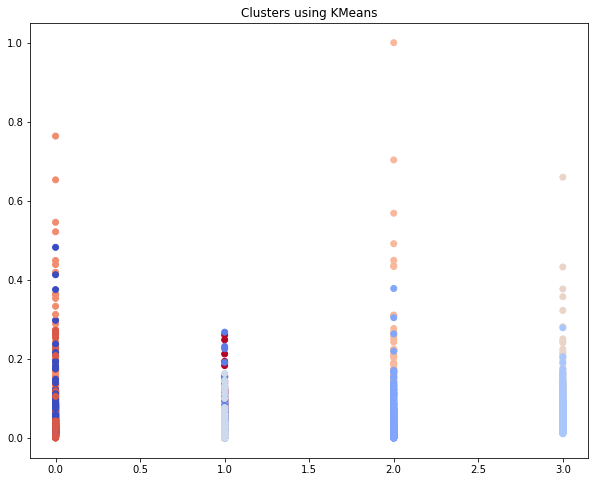

In [102]:
plt.figure(figsize=(10,8))
plt.scatter(x="clust",y ="Balance",data=ndf,c=clf.labels_,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 
plt.show()

In [104]:
WCSS

[1830.7932128584114,
 823.6756984125207,
 625.1768205797017,
 436.70885761932624,
 348.9433217254137,
 315.14860977984205,
 287.730529153247,
 263.2132188914899,
 243.93051296436542,
 231.7713497444087]

## DBScan

In [106]:
new=data1.iloc[:,0:11]
new

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [108]:
std=StandardScaler().fit(new)
x=std.transform(new)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [110]:
db=DBSCAN(eps=0.375,min_samples=12)
db.fit(x)

DBSCAN(eps=0.375, min_samples=12)

In [112]:
db.labels_ #-1 is noise(outliers)

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [113]:
C=pd.DataFrame(db.labels_,columns=['clust'])
C

,clust
0,0
1,0
2,0
3,0
4,-1
...,...
3994,-1
3995,-1
3996,-1
3997,0


In [114]:
newdf1=pd.concat([new,C],axis=1)
newdf1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,-1
3995,64385,0,1,1,1,981,5,0,0,1395,1,-1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,-1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


Text(0.5, 1.0, 'Clusters using DBScan')

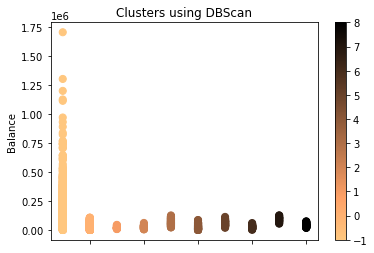

In [115]:
newdf1.plot(x="clust",y ="Balance",c=db.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan') 

In [116]:
dl=db.labels_
import sklearn
sklearn.metrics.silhouette_score(x, dl)

-0.20905932423409274

In [117]:
from sklearn.neighbors import NearestNeighbors 
neigh = NearestNeighbors(n_neighbors=22)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x) 

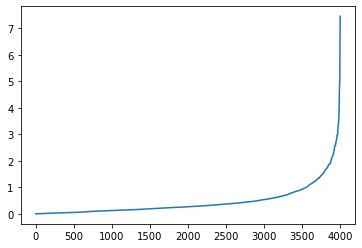

In [118]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances) 

In [119]:
s=DBSCAN(eps=3,min_samples=12)
s.fit(x)
S=s.labels_

In [120]:
eps = np.arange(0.05,0.5, 0.01)
eps
sklearn.metrics.silhouette_score(x, S)

0.5445912609076593